## Kapittel 1. Innledning 

#### Avgifter 

Priser er med å påvirke de beslutningene konsumenter tar når de bestemmer hva de skal kjøpe eller konsumere av ulike goder (Andreassen et al., 2021, s. 34.) 

Stortinget kan indirekte igjennom avgifter eller skatter være med å påvirke beslutninger. Gjennom avgifter kan for eksempel en CO2 avgift på produksjon av sement, eller en CO2 avgift på bruk av bensin og diesel være med å påvirke beslutninger til de ulike aktørene i økonomien. På lik linje kan stortinget innføre en turistskatt eller en avgift på reiselivet. Vi kan bruke konkrete eksempler her: et besøksbidrag vil skape inntekter til staten, disse inntektene kan brukes til å forbedre goder som er tilknyttet reiselivet. Det kan bety bedre tilretteleggelse av aktiviteter, noe som igjen bidra til at næringen blir mer helårlig, skaper mer verdier, og at næringen samtidig bidrar til et grønnere skifte. En avgift vil dermed kunne stimulere reiselivet, som nettopp har vært igjennom to år med en tøff pandemi. Man kan også argumentere for at en slik avgift kan ha motsatt effekt. Økte avgifter fører til økte priser og mindre etterspørsel, og kan på lang sikt være uønsket. Slike økonomiske årsak-virkninger sammenhenger kan være vanskelige å oppdage, og blir viktige når det arbeides med samfunnsøkonomiske spørsmål. 

#### Hvorfor turistskatt?

Et reisemål inneholder flere fellesgoder som ikke tilfaller den enkelte næringsaktør, men som er av betydning for reisemålets attraksjons verdi. Tilrettelegging av ulike aktiviteter, informasjon, opplevelser og miljøet på reisemålet er alle viktige faktorer som påvirker opplevelsen av et reisemål, og det er ikke bare næringsaktørene som bidrar til den totale opplevelsen. Staten, fylkeskommuner, kommuner, frivillighet og næringslivet bidrar alle i ulik grad og på forskjellige måter til å finansiere goder som er tilknyttet reiselivet (regjeringen, 2023). Disse godene har en betydning for næringsaktørenes kundegrunnlag og omsetning. Fellesgodene kan ved hjelp av turistskatt eller et besøksbidrag finansieres, og dette kan bidra til videre utvikling av fellesgodene.

#### Lofoten - Pilotprosjekt

Populære turistattraksjoner slik som Nordkapp, Beitostølen og Lofoten er alle opp til vurdering for besøksbidrag. Formålet med avgiften er å senke trykket av turister, og gjøre næringen mer bærekraftig og helårlig. Per har ingen av reisemålene innført avgiften, men Lofoten er blant de mest aktuelle ifølge næringsminister, Jan Christian Vestre. 



## Kapittel 2. Markedet

In [26]:
import json
import pandas as pd
import requests
from pyjstat import pyjstat

postUrl = "https://data.ssb.no/api/v0/no/table/10604/"

apiQuery = {
  "query": [
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "OTV"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [27]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

df

,reiselivsnæring,statistikkvariabel,år,value
0,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2011,21.4
1,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2012,21.9
2,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2013,22.0
3,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2014,22.8
4,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2015,23.5
5,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2016,23.8
6,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2017,24.2
7,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2018,24.5
8,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2019,24.9
9,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,20.3


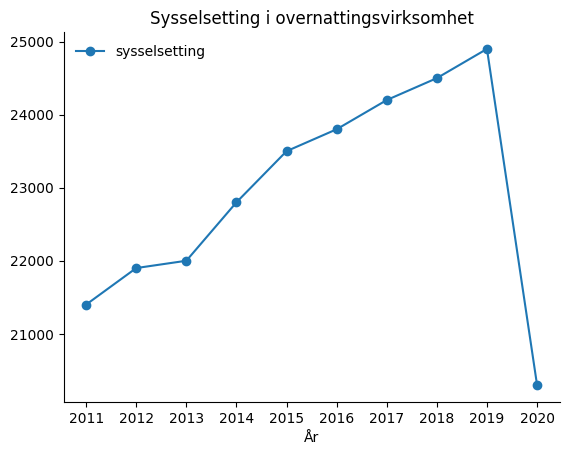

In [44]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(df['år'],df['value']*1000, label = 'sysselsetting', marker = 'o')
ax.legend(loc='best', frameon = False)
ax.title.set_text('Sysselsetting i overnattingsvirksomhet')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('År');

#### Kildeliste

Regjeringen. (2023, 19. Januar). Vurderer destinasjoner for besøksbidrag.
https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954

Andreassen, Viggo., Bredesen, Ivar., Thøgersen, Joachim. (2021). Innføring i Mikroøkonomi. For økonomisk-administrative stuider (3.utg). Cappelen Damm. 